---
# HW3_solution -> Dataset collection
* Name: Egri Dávid
* Neptun: ASLG76
---

# Load the packages

Basic packages

In [1]:
# Numeric calculation and data handling
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib notebook

# for operations with dates
import time
from datetime import date
from datetime import timedelta

Specific packages

In [2]:
# for data collection from Web
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import Select

#the handle accentuated letters
from unidecode import unidecode

# Function for getting the data from the website

In [3]:
def get_data (driver, year, month):
    date_year = driver.find_element_by_name('ev')
    date_month = Select(driver.find_element_by_name('ho'))

    date_year.send_keys(year)
    date_month.select_by_value(month)

    search_button = driver.find_element_by_name('button')
    search_button.click()
    
    html_source = driver.page_source
    
    return html_source

In [4]:
def format_data (html_source):
    
    # read the raw html with the pandas built-in function
    df = pd.read_html(html_source)[0]

    # ---------------------------------------------------------
    # modify the given dataframe to get the needed informations
    # ---------------------------------------------------------

    # set right coloumn names
    df = df.rename(index=str, columns=df.loc[0].to_dict())
    # drop the first row
    df = df.drop(df.index[[0]])
    # handle the accentuated letters
    df['Nap'] = df['Nap'].apply(unidecode)
    # get the data
    df['Nap'] = df['Nap'].str.extract('([0-9]*[.]?[0-9]*[.]?[0-9]+)?([a-z]+)', expand=True)[0]
    # ranem the data coloumn in english
    df = df.rename(columns={'Nap': "Day"})
    df['Day'] = pd.to_datetime(df['Day'])
    # use date as index
    df = df.set_index('Day')
    # temperature to float numbers
    df[['Tmax  [°C]', 'Tmin  [°C]']] = df[['Tmax  [°C]', 'Tmin  [°C]']].astype(float)
    # get the average temperature
    df['Temperature'] = (df['Tmax  [°C]']+df['Tmin  [°C]'])/2
    # drop the not needed coloumns
    df = df.drop(columns=['Tmax  [°C]', 'Tmin  [°C]', 'Szél \t[m/s]', 'Csapadék \t[mm]'])
    
    return df

# Open a web broser and load the examined webpage

In [5]:
# Using Chrome to access web
driver = webdriver.Chrome('/Users/egridavid.bp/Documents/GitHub/EgriDavid_ASLG76_Deep_learning_course/HW3_EgriDávid_ASLG76/chromedriver')
# Open the website
driver.get('http://idojarasbudapest.hu/archivalt-idojaras')

Result example

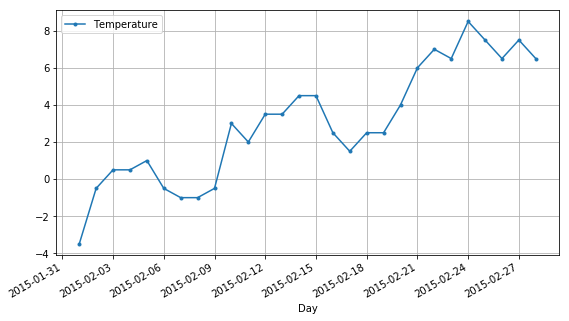

In [6]:
html_source = get_data(driver,'2015', '02')
df = format_data(html_source)

fig, ax = plt.subplots()
df.plot(x_compat=True, ax=ax, figsize=(9,5), grid=5, marker='.')

# Collecting the data

In [7]:
years = np.array(['2012', '2013', '2014', '2015', '2016', '2017', '2018'])
months = np.array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

today = date.fromtimestamp(time.time())

result = []
for year in years:
    for month in months:
        if int(year) == today.year:
            if int(month) > today.month:
                break
                
        html_source = get_data(driver,year, month)

        time.sleep(5)
        
        df = format_data(html_source)
        result.append(df)

data = pd.concat(result)

Shut down the opened web browser

In [8]:
driver.close()

# Data exploration and manipulation

In [14]:
data.head()

,Temperature
Day,
2012-01-01,1.0
2012-01-02,2.0
2012-01-03,3.5
2012-01-04,3.5
2012-01-05,2.0
2012-01-06,2.5
2012-01-07,1.5
2012-01-08,2.0
2012-01-09,1.5


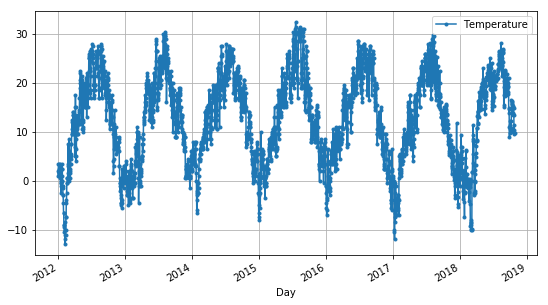

In [10]:
fig, ax = plt.subplots()
data.plot(x_compat=True, ax=ax, figsize=(9,5), grid=5, marker='.')

Save data to csv file

In [ ]:
data.to_csv('data.csv', sep='\t')

Read data from .csv file

In [15]:
probe = pd.read_csv('data.csv', index_col=0, delimiter = '\t', header=0)
probe.index = pd.to_datetime(probe.index)

Test that everything was fine with the file writing and reading

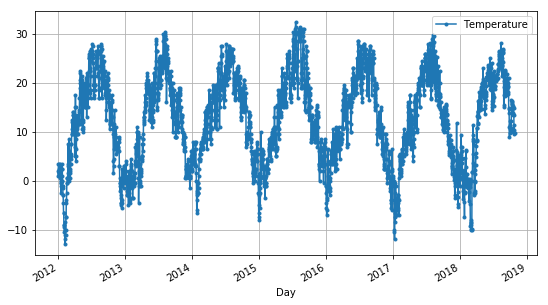

In [16]:
fig, ax = plt.subplots()
probe.plot(x_compat=True, ax=ax, figsize=(9,5), grid=5, marker='.')